#Introducción a la Ciencia de los Datos, CIDE (Profesor Gonzalo Castañeda)
## P12. kNN (vecinos cercanos) con Python
### Basado en: Klein, Bernd. april, 2022. “Python-course.eu” Tutorial: Machine Learning with Python,
### https://python-course.eu/machine-learning/
### Cap. 8-9

## (1) Preparación de la base de datos

In [1]:
# Primero vamos a emplear solo rutinas con Python, sin usar librerías de Machine Learning

In [3]:
# Hacemos uso de la base de 'Iris' que está disponible en la librería sklearn
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
data = iris.data                  # En data se encuentran los atributos de las instancias
labels = iris.target              # En target se encuentran las etiquetas asociadas
# Imprimimos algunas instancias (de acuerdo con su índice)
for i in [0, 79, 99, 121]:        
    print(f"index: {i:3}, features: {data[i]}, label: {labels[i]}")

index:   0, features: [5.1 3.5 1.4 0.2], label: 0
index:  79, features: [5.7 2.6 3.5 1. ], label: 1
index:  99, features: [5.7 2.8 4.1 1.3], label: 1
index: 121, features: [5.6 2.8 4.9 2. ], label: 2


In [4]:
# Creamos un conjunto de aprendizaje y otro de prueba
# Recurrimos a las permutaciones para elegir los datos de forma aleatoria
np.random.seed(42)       # fijamos la semilla para generar siempre los mismos valores
indices = np.random.permutation(len(data)) # vector de indices cuyo tamaño son las instancias 

n_training_samples = 12                                     # Solo consideramos 12 instancias
learn_data = data[indices[:-n_training_samples]]            # para el aprendizaje
learn_labels = labels[indices[:-n_training_samples]]
test_data = data[indices[-n_training_samples:]]             # para la prueba
test_labels = labels[indices[-n_training_samples:]]

print("The first samples of our learn set:")       #Imprimimos una cabezera
print(f"{'index':7s}{'data':20s}{'label':3s}")
for i in range(5):
    print(f"{i:4d}   {learn_data[i]}   {learn_labels[i]:3}")

print("The first samples of our test set:")
print(f"{'index':7s}{'data':20s}{'label':3s}")
for i in range(5):
    print(f"{i:4d}   {learn_data[i]}   {learn_labels[i]:3}")

The first samples of our learn set:
index  data                label
   0   [6.1 2.8 4.7 1.2]     1
   1   [5.7 3.8 1.7 0.3]     0
   2   [7.7 2.6 6.9 2.3]     2
   3   [6.  2.9 4.5 1.5]     1
   4   [6.8 2.8 4.8 1.4]     1
The first samples of our test set:
index  data                label
   0   [6.1 2.8 4.7 1.2]     1
   1   [5.7 3.8 1.7 0.3]     0
   2   [7.7 2.6 6.9 2.3]     2
   3   [6.  2.9 4.5 1.5]     1
   4   [6.8 2.8 4.8 1.4]     1


## (2) Selección de vecinos

In [ ]:
# Para calcular la distancia euclidiana usamos la función 'norm' de np.linalg

In [5]:
# Calculamos la distancia entre dos instancias mediante una función 
def distance(instance1, instance2):
    return np.linalg.norm(np.subtract(instance1, instance2))
# Veamos un ejemplo
print(distance([3, 5], [1, 1]))                 # Un ejemplo con dos listas
print(distance(learn_data[3], learn_data[44]))  # Un ejemplo con los datos de Iris

4.47213595499958
3.4190641994557516


In [ ]:
# Algoritmo para calcular una lista con los k vecinos más cercanos

In [6]:
# Con una definición 'get_neighbors' establecemos la lista de vecinos cercanos
# vamos a crear una lista de k tuplas de tamaño 3 (atributos, distancia, etiqueta)
# atributos de la instancia en conjunto de aprendizaje; distancia = distancia euclidiana
def get_neighbors(training_set, 
                  labels, 
                  test_instance,     # punto en custión es una instancia en el conjunto de prueba
                  k,                 # Número de vecinos
                  distance):         # aquí especificamos el metodo de distancia que empleamos
    distances = []    # Aquí guardamos las tuplas para todas las instancias de aprendizaje
    for index in range(len(training_set)):   # Buscamos solo en el conjunto de aprendizaje
        dist = distance(test_instance, training_set[index])   # Calculamos distancias
        distances.append((training_set[index], dist, labels[index]))  # Armamos las tuplas
    distances.sort(key=lambda x: x[1])  # Ordenamos con respecto al elemento 1 de la tupla 
    neighbors = distances[:k]  # En vecinos cercanos  ponemos a las k distancias más reducidas
    return neighbors

In [7]:
# Aplicamos el método a los datos de Iris y buscamos clasificar a 5 puntos en cuestión 
# (instancias del conjunto de prueba) 
for i in range(5):
    neighbors = get_neighbors(learn_data, 
                              learn_labels, 
                              test_data[i],          # Instancia i
                              3,                     # Valor de k
                              distance=distance)     # Llama al método de distancia
    print("Index:         ",i,'\n',                  # \n = cambia la línea
          "Testset Data:  ",test_data[i],'\n', # Imprime los atributos de instancia i en cuestión
          "Testset Label: ",test_labels[i],'\n',     
          "Neighbors:      ",neighbors,'\n') # Recordar tuplas: (atributos, distancia, etiqueta) 

Index:          0 
 Testset Data:   [5.7 2.8 4.1 1.3] 
 Testset Label:  1 
 Neighbors:       [(array([5.7, 2.9, 4.2, 1.3]), 0.14142135623730995, 1), (array([5.6, 2.7, 4.2, 1.3]), 0.17320508075688815, 1), (array([5.6, 3. , 4.1, 1.3]), 0.22360679774997935, 1)] 

Index:          1 
 Testset Data:   [6.5 3.  5.5 1.8] 
 Testset Label:  2 
 Neighbors:       [(array([6.4, 3.1, 5.5, 1.8]), 0.1414213562373093, 2), (array([6.3, 2.9, 5.6, 1.8]), 0.24494897427831783, 2), (array([6.5, 3. , 5.2, 2. ]), 0.3605551275463988, 2)] 

Index:          2 
 Testset Data:   [6.3 2.3 4.4 1.3] 
 Testset Label:  1 
 Neighbors:       [(array([6.2, 2.2, 4.5, 1.5]), 0.2645751311064586, 1), (array([6.3, 2.5, 4.9, 1.5]), 0.574456264653803, 1), (array([6. , 2.2, 4. , 1. ]), 0.5916079783099617, 1)] 

Index:          3 
 Testset Data:   [6.4 2.9 4.3 1.3] 
 Testset Label:  1 
 Neighbors:       [(array([6.2, 2.9, 4.3, 1.3]), 0.20000000000000018, 1), (array([6.6, 3. , 4.4, 1.4]), 0.2645751311064587, 1), (array([6.6, 2.9, 4.

## (3) Definición del pronóstico

In [ ]:
# Para determinar la etiqueta definimos el voto de mayoría relativa (pluralidad)

In [8]:
# Veamos una librería nueva  Collection con un módulo llamado Counter
from collections import Counter
t = Counter("sssssshhhhhcccdddd")   # Generamos un counter de un string
t.most_common(3)  # Calcula la frecuencia y elige los tres valores más altos
# Establece keys (letra) y sus valores asociados como en un diccionario
# Notar que excluye a 'c'

[('s', 6), ('h', 5), ('d', 4)]

In [9]:
t.most_common(1)[0][0]   # especificamos la key más frecuente

's'

In [10]:
t.most_common(1)[0][1]   # especificamos la frecuencia

6

In [11]:
total = sum(t.values())  # sumamos la cantidad de observaciones
total

18

In [13]:
# Una forma de crear un contador
cadena = "sssssshhhhhcccdddd"
numero_letras = len(cadena)
lista = Counter()                  # En lista creamos el counter
for indice in range(numero_letras): 
     lista[cadena[indice]] += 1    # Contamos manualemente las letras de la cadena
lista   # Se muestra como un diccionario

Counter({'s': 6, 'h': 5, 'c': 3, 'd': 4})

In [14]:
# Si no quiero sumar los valores comunes aritméticamente sino más bien darles una mayor peso 
# conforme van apareciendo: usamos ponderaciones = 1, 1/2, 1/3, 1/4
cadena = "sssssshhhhhcccdddd"
numero_letras = len(cadena)
lista = Counter()
for indice in range(numero_letras): 
     lista[cadena[indice]] += 1/(indice + 1)
lista

Counter({'s': 2.4499999999999997,
         'h': 0.5698773448773449,
         'c': 0.23168498168498167,
         'd': 0.24354575163398692})

In [15]:
# definimos la letra más común  (i.e., con la suma ponderada más elevada)
lista.most_common(1)[0][0]

's'

In [16]:
from collections import Counter            # Counter() Libreria de conteo

def vote(neighbors):
    class_counter = Counter()              # Creamos diccionario que opera como contador 
    for neighbor in neighbors:             # Iteramos sobre todos los vecinos cercanos
        class_counter[neighbor[2]] += 1    # Checamos sus etiquetas y calculamos frecuencia 
    return class_counter.most_common(1)[0][0]  # Elegimos etiqueta mas común 

In [17]:
# Sacamos los pronósticos para 12 instancias de prueba; 12 = tamaño del conjunto de aprendizaje
for i in range(12):
    neighbors = get_neighbors(learn_data, 
                              learn_labels, 
                              test_data[i], 
                              3, 
                              distance=distance)
    print("index: ", i, 
          ", result of vote: ", vote(neighbors), # Aquí hacemos el pronóstico
          ", label: ", test_labels[i],      # Especificamos la etiqueta que presentan los datos
          ", data: ", test_data[i])
    # Notar que pocas veces se equivoca el pronóstico de clasificación

index:  0 , result of vote:  1 , label:  1 , data:  [5.7 2.8 4.1 1.3]
index:  1 , result of vote:  2 , label:  2 , data:  [6.5 3.  5.5 1.8]
index:  2 , result of vote:  1 , label:  1 , data:  [6.3 2.3 4.4 1.3]
index:  3 , result of vote:  1 , label:  1 , data:  [6.4 2.9 4.3 1.3]
index:  4 , result of vote:  2 , label:  2 , data:  [5.6 2.8 4.9 2. ]
index:  5 , result of vote:  2 , label:  2 , data:  [5.9 3.  5.1 1.8]
index:  6 , result of vote:  0 , label:  0 , data:  [5.4 3.4 1.7 0.2]
index:  7 , result of vote:  1 , label:  1 , data:  [6.1 2.8 4.  1.3]
index:  8 , result of vote:  1 , label:  2 , data:  [4.9 2.5 4.5 1.7]
index:  9 , result of vote:  0 , label:  0 , data:  [5.8 4.  1.2 0.2]
index:  10 , result of vote:  1 , label:  1 , data:  [5.8 2.6 4.  1.2]
index:  11 , result of vote:  2 , label:  2 , data:  [7.1 3.  5.9 2.1]


## (4) Clasificación con vecinos cercanos ponderados

In [ ]:
# Vamos ahora a tomar en cuenta el hecho de que entre más alejado es un vecino más se diferencía
# de la instancia en cuestión
# Por lo que vamos a usar como ponderadores a los valores de una serie armónica
# Entre más cercano, mas alto es ese valor

### Serie armónica  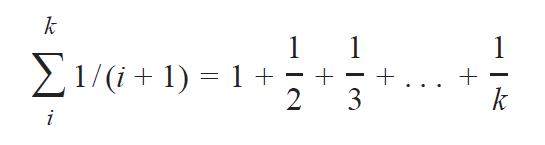

In [18]:
# tenemos que crear una nueva función para calcular el voto
def vote_harmonic_weights(neighbors):
    class_counter = Counter()
    number_of_neighbors = len(neighbors)
    for index in range(number_of_neighbors):
        class_counter[neighbors[index][2]] += 1/(index+1)   #Aquí ponderamos por el ranking
        # de cercania (index), de tal forma que más lejos menor peso
    return class_counter.most_common(1)[0][0]

In [19]:
# Aplicamos el algoritmo para 12 instancias de prueba
for i in range(12):
    neighbors = get_neighbors(learn_data, 
                              learn_labels, 
                              test_data[i], 
                              6,                   # número de vecinos   K = 6  
                              distance=distance)
    print("index: ", i, 
          ", result of vote: ", 
          vote_harmonic_weights(neighbors),
          "label: ", test_labels[i])

index:  0 , result of vote:  1 label:  1
index:  1 , result of vote:  2 label:  2
index:  2 , result of vote:  1 label:  1
index:  3 , result of vote:  1 label:  1
index:  4 , result of vote:  2 label:  2
index:  5 , result of vote:  2 label:  2
index:  6 , result of vote:  0 label:  0
index:  7 , result of vote:  1 label:  1
index:  8 , result of vote:  1 label:  2
index:  9 , result of vote:  0 label:  0
index:  10 , result of vote:  1 label:  1
index:  11 , result of vote:  2 label:  2


In [20]:
# Ahora queremos ponderar no en función del ranking de la cercanía si no usando la propia
# distancia, de tal forma que a menor distancia mayor peso.
def vote_distance_weights(neighbors):
    class_counter = Counter()               
    for neighbor in neighbors:             
        class_counter[neighbor[2]] += 1/(neighbor[1]**2+1)  # Aquí aplicamos la distancia
        # recordar que se trata del segundo elemento de la tupla
    return class_counter.most_common(1)[0][0]

In [21]:
# Aplicamos el algoritmo para 12 instancias de prueba
for i in range(12):
    neighbors = get_neighbors(learn_data, 
                              learn_labels, 
                              test_data[i], 
                              6, 
                              distance=distance)
    print("index: ", i, 
          ", result of vote: ", 
          vote_distance_weights(neighbors),
          "label: ", test_labels[i])

index:  0 , result of vote:  1 label:  1
index:  1 , result of vote:  2 label:  2
index:  2 , result of vote:  1 label:  1
index:  3 , result of vote:  1 label:  1
index:  4 , result of vote:  2 label:  2
index:  5 , result of vote:  2 label:  2
index:  6 , result of vote:  0 label:  0
index:  7 , result of vote:  1 label:  1
index:  8 , result of vote:  1 label:  2
index:  9 , result of vote:  0 label:  0
index:  10 , result of vote:  1 label:  1
index:  11 , result of vote:  2 label:  2


In [ ]:
# Aplicamos el mismo esquema de voto, pero con otros datos

In [22]:
# Atributos de las 8 instancias de entrenamiento
train_set = [(1, 2, 2), 
             (-3, -2, 0),
             (1, 1, 3), 
             (-3, -3, -1),
             (-3, -2, -0.5),
             (0, 0.3, 0.8),
             (-0.5, 0.6, 0.7),
             (0, 0, 0)
            ]
# Etiquetas de las 8 instancias de entrenamiento
labels = ['apple',  'banana', 'apple', 
          'banana', 'apple', "orange",
          'orange', 'orange']

k = 2

# Instancias en cuestión a etiquetar
for test_instance in [(0, 0, 0), (2, 2, 2), 
                      (-3, -1, 0), (0, 1, 0.9),
                      (1, 1.5, 1.8), (0.9, 0.8, 1.6)]:
    # llama a la rutina de exploración de vecinos
    neighbors = get_neighbors(train_set, 
                              labels, 
                              test_instance, 
                              k,
                              distance=distance)  # Llama a rutina de calculo de distancia

    print("vote distance weights: ", 
          vote_distance_weights(neighbors))       #Llama a rutina de votación

vote distance weights:  orange
vote distance weights:  apple
vote distance weights:  banana
vote distance weights:  orange
vote distance weights:  apple
vote distance weights:  apple


## (5)  kNN con sklearn

In [23]:
# Vamos a crear una base de datos artificiales, con datos aleatorios alrededor de ciertos
# centros en un espacio bidimensional
from sklearn.datasets import make_blobs      # Usamos el método visto en la sesión anterior
import matplotlib.pyplot as plt
import numpy as np

centers = [[2, 3], [5, 5], [1, 8]]
n_classes = len(centers)
data, labels = make_blobs(n_samples=150, 
                          centers=np.array(centers),
                          random_state=1)

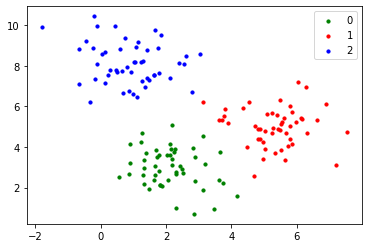

In [24]:
# Visualicemos a los datos
import matplotlib.pyplot as plt

colours = ('green', 'red', 'blue')   # Los colores se usan para identificar a las etiquetas
n_classes = 3

fig, ax = plt.subplots()
for n_class in range(0, n_classes):
    ax.scatter(data[labels==n_class, 0], data[labels==n_class, 1], 
               c=colours[n_class], s=10, label=str(n_class))
ax.legend(loc='upper right')
# Se generaron tres manchones de datos que a simple vista son evidentes

In [25]:
# Creamos los conjuntos de aprendizaje y prueba con sklearn
from sklearn.model_selection import train_test_split
res = train_test_split(data, labels, 
                       train_size=0.8,   # tamaño relativo del conjunto de aprendizaje
                       test_size=0.2,
                       random_state=1)   # semilla aleatoria

train_data, test_data, train_labels, test_labels = res   # deben ir en este orden siempre
# primero data  y luego label, primero train y luego test

In [26]:
# Aplicamos el algoritmo de kNN a esta base de datos
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
# Se especifica el algoritmo y la correspondencia entre atributos y etiquetas
knn.fit(train_data, train_labels)      
predicted = knn.predict(test_data)     
# Lleva a cabo búsqueda de vecinos y predicciones con voto de mayoría relativa
print("Predictions from the classifier:")
print(predicted)
print("Target values:")                # Estas son las etiquetas a replicar
print(test_labels)
# Vemos que la predicción de kNN (k = 5, default) es muy certera 

Predictions from the classifier:
[2 2 2 0 0 1 1 2 2 1 0 1 0 0 2 0 0 0 1 0 0 1 1 2 0 0 0 1 2 1]
Target values:
[2 2 2 0 0 1 1 2 2 1 0 1 0 0 2 0 0 0 1 0 0 1 1 2 0 0 0 1 2 1]


In [27]:
# En general para evaluar la calidad de la predicción, usamos accuracy score.
# Suponiendo un vector de etiquetas reales y otra predecida
from sklearn.metrics import accuracy_score
example_predictions = [0, 2, 1, 3, 2, 0, 1]
example_labels      = [0, 1, 2, 3, 2, 1, 1]
print(accuracy_score(example_predictions, example_labels)) # Ojo con orden: predecido,observado 
# Etiquetas acertadas / Número total de predicciones
# Le atina poco más de la mitad

0.5714285714285714


In [28]:
# Si solo queremos saber el número de etiquetas acertadas
print(accuracy_score(example_predictions, 
                     example_labels,
                     normalize=False))

4


In [29]:
# En el ejemplo de los manchones se tiene un 100% de similitud
accuracy_score(predicted, test_labels)

1.0

In [30]:
# Podemos aplicar el algoritmo clasificador con una serie de argumentos
knn = KNeighborsClassifier(algorithm='auto', 
                           leaf_size=30, 
                           metric='minkowski',
                           metric_params=None, 
                           n_jobs=1, 
                           n_neighbors=5, 
                           p=2,        # corresponde a la p de Minkowski; 2 equivale a euclidiana
                           weights='uniform')
# Recordar que kNN puede usar varios algoritmos de búsqueda de vecinos
# (ball_tree, kd_tree, brute) si ponemos 'auto' eige el método más adecuado de acuerdo
# con los hiperparámetros del modelo
# leaf_size  se usa para los dos primeros algoritmos

## (5) Apliquemos kNN en sklearn con los datos de Iris

In [31]:
# Importamos base de datos y método para dividir la muestra
from sklearn import datasets
from sklearn.model_selection import train_test_split
# Descargamos los datos
iris = datasets.load_iris()
# Creamos conjuntos de aprendizaje y prueba
data, labels = iris.data, iris.target
res = train_test_split(data, labels, 
                       train_size=0.8,
                       test_size=0.2,
                       random_state=12)
train_data, test_data, train_labels, test_labels = res 
# Importamos el método de clasificación
from sklearn.neighbors import KNeighborsClassifier
# Hacemos la clasificación tomando parámetros de default
knn = KNeighborsClassifier()
knn.fit(train_data, train_labels)   # Establecemos correspondencia atributos --- etiquetas 
# Realizamos predicciones
print("Predictions from the classifier:")
test_data_predicted = knn.predict(test_data)  # Ojo aquí solo predecimos con los datos de prueba
print(test_data_predicted)
print("Target values:")
print(test_labels)

Predictions from the classifier:
[0 2 0 1 2 2 2 0 2 0 1 0 0 0 1 2 2 1 0 2 0 1 2 1 0 2 1 1 0 0]
Target values:
[0 2 0 1 2 2 2 0 2 0 1 0 0 0 1 2 2 1 0 1 0 1 2 1 0 2 1 1 0 0]


In [32]:
# resulta una muy buena calidad de predicción, la cual corroboramos:
accuracy_score(test_data_predicted, test_labels)

0.9666666666666667

In [34]:
# Si usáramos los datos del conjunto de aprendizaje para predecir y no solo para escoger vecinos
print("Predictions from the classifier:")
learn_data_predicted = knn.predict(train_data) # Aquí ya sabe cuales son sus aributos asociados
print(learn_data_predicted)
print("Target values:")
print(train_labels)
print(accuracy_score(learn_data_predicted, train_labels))
# La calidad de predicción es marginalmente mejor, pero no siempre es el caso

Predictions from the classifier:
[0 1 2 0 2 0 1 1 0 1 1 0 0 0 0 0 0 0 2 0 2 1 1 1 0 2 1 1 2 0 2 0 2 1 2 2 1
 1 1 2 2 0 2 2 0 1 0 2 2 0 1 1 0 0 1 1 1 1 2 1 2 0 0 1 1 2 0 2 1 0 2 2 1 2
 2 0 0 2 1 1 2 0 1 1 0 1 1 2 2 1 0 2 0 2 0 0 1 2 2 1 2 2 0 1 1 0 2 2 2 1 2
 2 2 0 0 1 0 2 2 1]
Target values:
[0 1 2 0 2 0 1 1 0 1 1 0 0 0 0 0 0 0 2 0 2 1 1 1 0 2 1 1 2 0 2 0 2 2 2 2 1
 1 1 1 2 0 2 2 0 1 0 2 2 0 1 1 0 0 1 1 1 1 2 1 2 0 0 1 1 1 0 2 1 0 2 2 1 2
 2 0 0 2 1 1 2 0 1 1 0 1 1 2 2 1 0 2 0 2 0 0 1 2 2 1 2 2 0 1 1 0 2 2 2 1 2
 2 2 0 0 1 0 2 2 1]
0.975


In [44]:
# Le ponemos ahora argumentos al algoritmo de kNN
knn2 = KNeighborsClassifier(algorithm='brute',    # cambiamo algoritmo de búsqueda de vecinos
                            leaf_size=30, 
                            metric='manhattan',   # cambamos distancia
                            metric_params=None, 
                            n_jobs=1, 
                            n_neighbors=2,        # cambiamos número de vecinos
                            p=2,         # p=2 es equivalente a euclidiana en minkowski
                            weights='uniform')

knn.fit(train_data, train_labels) 
test_data_predicted = knn.predict(test_data)
accuracy_score(test_data_predicted, test_labels)
# Funciona muy bien el método a pesar de los cambios:

0.9666666666666667

## (7) Clasificador del radio (RadiusNeighborsClassifier)

In [ ]:
# Si ahora lo que es fijo, no es el número de vecinos, sino el radio en que se ubican los vecinos
# Las partes más densas del espacio de atributos tendrán más vecinos
# y las partes menos densas presentarán pocos vecinos

In [45]:
from sklearn.neighbors import RadiusNeighborsClassifier
# Creamos base de datos con argumentos y etiquetas
X = [[0, 1], [0.5, 1], [3, 1], [3, 2], [1.3, 0.8], [2.5, 2.5]]
y = [0, 0, 1, 1, 0, 1]

neigh = RadiusNeighborsClassifier(radius=1.0)
neigh.fit(X, y)
# Hacemos las predicciones a partir de vecinos cercanos en la base de datos original (X, y)
print(neigh.predict([[1.5, 1.2]]))  # Predicciones con otros atributos

print(neigh.predict([[3.1, 2.1]]))

[0]
[1]


In [46]:
# Generamos ahora otros manchones de datos, pero con más dispersión 
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

centers = [[2, 3], [5, 5], [7, 9]]
n_classes = len(centers)
data, labels = make_blobs(n_samples=155, 
                          centers=np.array(centers),
                          cluster_std = 1.3,          # Aquí se pone la mayor varianza
                          random_state=1)

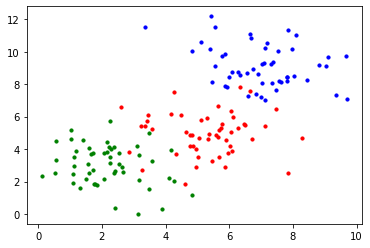

In [47]:
import matplotlib.pyplot as plt

colours = ('green', 'red', 'blue')
n_classes = 3

fig, ax = plt.subplots()
for n_class in range(0, n_classes):
    ax.scatter(data[labels==n_class, 0], data[labels==n_class, 1], 
               c=colours[n_class], s=10, label=str(n_class))
# Notar que los manchones están más traslapados

In [48]:
# Separamos los dos conjuntos 
res = train_test_split(data, labels, 
                       train_size=0.8,
                       test_size=0.2,
                       random_state=1)
train_data, test_data, train_labels, test_labels = res

In [50]:
# Aplicamos el método delradio fijo
rnn = RadiusNeighborsClassifier(radius=1)
rnn.fit(train_data, train_labels)
# Hacemos predicciones
predicted = rnn.predict(test_data)
print(accuracy_score(predicted, test_labels))
# Notar que bajo un poco la capacidad de predicción (con respecto a kNN anteriores usando Iris) 
# pero sigue siendo alta

0.9354838709677419


In [51]:
# Vamos a comparar con kNN para otro valor de k para estos mismos clústeres de datos
# Como heurística se puede elegir el valor de k:
k = int(len(labels) ** 0.5)          # la raíz cuadrada del número de instancias totales
# Evitamos que sea par
if k % 2 == 0:
    k += 1
k

13

In [52]:
# Usamos la distancia euclidiana con k = 13
knn = KNeighborsClassifier(algorithm='auto', 
                     leaf_size=30, 
                     metric='minkowski',
                     metric_params=None, 
                     n_jobs=1, 
                     n_neighbors=k, # default es 5
                     p=2,         # p=2 is equivalent to euclidian distance
                     weights='uniform')

knn.fit(data, labels)
predicted = knn.predict(test_data)
print(accuracy_score(predicted, test_labels))
# Notar que se logra una predicción ligeramente mejor

0.967741935483871


In [53]:
# Calculemos ahora la matriz de confusión
from sklearn.metrics import confusion_matrix 
# Podeos evaluar el modelo
cm = confusion_matrix(predicted, test_labels)
print(cm)
# Solo falla la predicción de una tercera etiqueta (valores reales = renglones)
# a la que se le asigna (predicciones = columnas) una segunda etiqueta de manera equivocada

[[10  0  0]
 [ 0  7  0]
 [ 0  1 13]]


## (8) Ejercicio con otra base de datos

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # En ocasiones conviene escalar números grandes
# Con este tipo de escalamiento se tiene media cero varianza 1
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix     # Meétodos para evaluación predictiva
from sklearn.metrics import f1_score 
from sklearn.metrics import accuracy_score

In [55]:
# Creamos un Dataframe con los datos que estan úbicados en el dashboard de Jupyter
dataset = pd.read_csv("strange_flowers.txt", 
                      header=None, 
                      names=["red", "green", "blue", "size", "label"], #Asiganmos etiquetas
                      sep=" ")  # Separación viene con espacio
dataset

,red,green,blue,size,label
0,238.0,104.0,8.0,3.65,1.0
1,235.0,114.0,9.0,4.00,1.0
2,252.0,93.0,9.0,3.71,1.0
3,242.0,116.0,9.0,3.67,1.0
4,251.0,117.0,15.0,3.49,1.0
...,...,...,...,...,...
790,0.0,248.0,98.0,3.03,4.0
791,0.0,253.0,106.0,2.85,4.0
792,0.0,250.0,91.0,3.39,4.0
793,0.0,248.0,99.0,3.10,4.0


In [56]:
# Generamos la matriz de atributos y el vector de etiquetas
data = dataset.drop('label', axis=1)
labels = dataset.label

In [57]:
# Generamos los dos conjuntos de aprendizaje y prueba
X_train, X_test, y_train, y_test = train_test_split(data, 
                                                    labels, 
                                                    random_state=0, 
                                                    test_size=0.2) 

In [58]:
# Escalamos los atributos
scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train) #  transformación de datos de aprendizaje
X_test = scaler.transform(X_test) #  transformación de datos de prueba
X_train

array([[ 0.58460699, -0.57119956, -0.45894199, -0.30627378],
       [-1.89712845,  1.86063754,  1.85496972, -1.76994409],
       [ 0.58460699, -0.40348666, -0.30468121,  0.75082145],
       ...,
       [-1.89712845,  1.96126529,  1.88067985, -1.28205399],
       [ 0.44847804, -0.80599763, -0.48465212,  1.23871155],
       [-1.89712845,  1.89418013,  1.88067985, -1.68862908]])

In [59]:
# Establecemos el valor de k
k = int(len(X_train) ** 0.5)
k

25

In [60]:
# Establecemos el modelo kNN
classifier = KNeighborsClassifier(n_neighbors=k, 
                                  metric="euclidean") 
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred

array([3., 1., 3., 4., 3., 3., 1., 4., 3., 3., 4., 1., 3., 1., 2., 2., 2.,
       3., 1., 4., 2., 3., 4., 1., 3., 3., 4., 4., 1., 2., 1., 1., 2., 3.,
       1., 3., 3., 2., 2., 2., 3., 3., 4., 1., 4., 2., 3., 2., 3., 2., 2.,
       3., 1., 3., 4., 1., 2., 4., 2., 3., 3., 4., 3., 4., 3., 1., 2., 2.,
       1., 3., 3., 1., 4., 2., 2., 3., 2., 4., 2., 4., 1., 3., 4., 2., 4.,
       3., 2., 2., 2., 3., 2., 2., 3., 3., 1., 4., 2., 1., 2., 2., 1., 2.,
       4., 3., 3., 3., 2., 1., 2., 4., 2., 3., 3., 1., 2., 4., 3., 1., 1.,
       2., 1., 4., 3., 4., 2., 2., 3., 2., 4., 1., 4., 2., 4., 4., 4., 4.,
       4., 2., 4., 4., 4., 2., 3., 2., 1., 1., 2., 3., 1., 1., 3., 1., 2.,
       4., 2., 4., 2., 3., 1.])

In [61]:
# Evaluamos el modelo
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[31  1  0  0]
 [ 1 46  0  0]
 [ 0  0 44  0]
 [ 0  0  0 36]]


In [62]:
accuracy_score(y_test, y_pred)

0.9874213836477987

## Determinación del valor óptimo de k

In [ ]:
# Para distintos valores de k se grafica el accuracy_score

### Notar que con k pequeña las fronteras de decisión siguen más de cerca a las instancias del conjunto de entrenamiento, con mayor k estas fronteras son menos irregulares 

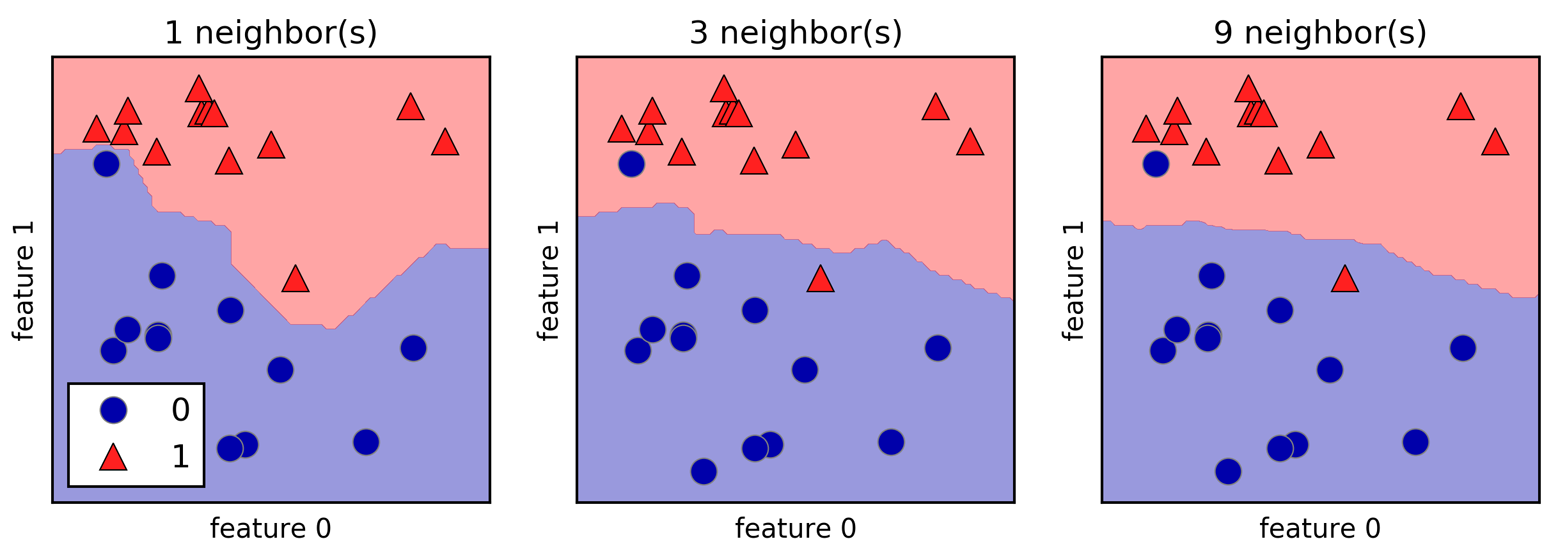

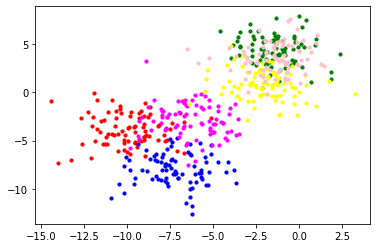

In [63]:
# Creamos de nuevo una base de datos con 6 clases de clústeres
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
n_classes = 6
data, labels = make_blobs(n_samples=500, 
                          centers=n_classes,
                          cluster_std = 1.6,
                          random_state=1)
colours = ('green', 'red', 'blue', 'magenta', 'yellow', 'pink')  # Asignamos colores a etiquetas
# Graficamos
fig, ax = plt.subplots()
for n_class in range(0, n_classes):
    ax.scatter(data[labels==n_class, 0], data[labels==n_class, 1], 
               c=colours[n_class], s=10, label=str(n_class))

350 150 350


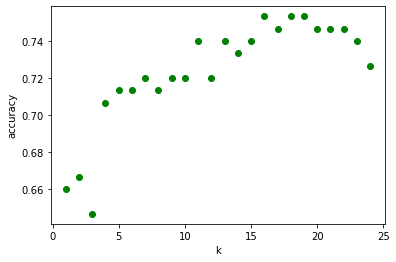

In [64]:
# Creamos los conjuntos de aprendizaje y prueba
res = train_test_split(data, labels, 
                       train_size=0.7,
                       test_size=0.3,
                       random_state=1)
train_data, test_data, train_labels, test_labels = res 

print(len(train_data), len(test_data), len(train_labels))

# Corremos el modelo para distintos valores de k
X, Y = [], []
for k in range(1, 25):
    classifier = KNeighborsClassifier(n_neighbors=k, 
                                      p=2,    # Euclidian
                                      metric="minkowski")
    classifier.fit(train_data, train_labels)
    predictions = classifier.predict(test_data)
    score = accuracy_score(test_labels, predictions)
    X.append(k)
    Y.append(score)
    


fig, ax = plt.subplots()
ax.set_xlabel('k')
ax.set_ylabel('accuracy')
ax.plot(X, Y, "go")
# K = 18, 19 parecen mejores valores en este caso
# Notar que los valores extremos de k no producen los mejores resultados